In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from citipy import citipy
import requests 

In [28]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
coordinates = list(lat_lngs)

In [30]:
# from citipy import citipy


In [31]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    country_code =citipy.nearest_city(coordinate[0], coordinate[1]).country_code
        #wind=citipy.nearest_city(coordinate[0], coordinate[1]).wind_speed
      # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


605

In [32]:
from config import weather_api_key

In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +weather_api_key
#print(url)


In [34]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [46]:
# Create an empty list to hold the weather data.
city_data=[]

    

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    try:
        # Parse the JSON and retrieve data.
      city_weather = requests.get(city_url).json()
       
        # Parse out the needed data.
      city_lat = city_weather["coord"]["lat"]
      city_lng = city_weather["coord"]["lon"]
      city_max_temp = city_weather["main"]["temp_max"]
      city_humidity = city_weather["main"]["humidity"]
      city_clouds = city_weather["clouds"]["all"]
      city_wind = city_weather["wind"]["speed"]
      city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
      city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
      city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
    # Add 1 to the record count.
    record_count += 1

    # Log the URL, record, and set numbers and the city.


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | sorland
Processing Record 3 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 4 of Set 1 | tezu
Processing Record 5 of Set 1 | padang
Processing Record 6 of Set 1 | vegreville
Processing Record 7 of Set 1 | lavrentiya
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | kouqian
Processing Record 12 of Set 1 | naryan-mar
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | praia
Processing Record 15 of Set 1 | yar-sale
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | la ronge
Processing Record 21 of Set 1 | aliaga
Processing Record 22 of Set 1 | car

Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | sayyan
Processing Record 40 of Set 4 | srednekolymsk
Processing Record 41 of Set 4 | nieuwegein
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | hovd
Processing Record 45 of Set 4 | chifeng
Processing Record 46 of Set 4 | tongliao
Processing Record 47 of Set 4 | erzin
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | geraldton
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | esmeraldas
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | myitkyina
Processing Record 7 of Set 5 | zyryanka
Processing Record 8 of Set 5 | hunza
City not found. Skipping...
Processing Record 9 of Set 5 | san francisco
Processing Record 10 of Set 5 | ka

Processing Record 26 of Set 8 | omboue
Processing Record 27 of Set 8 | itarema
Processing Record 28 of Set 8 | gari
Processing Record 29 of Set 8 | brainerd
Processing Record 30 of Set 8 | honningsvag
Processing Record 31 of Set 8 | dagda
Processing Record 32 of Set 8 | bonthe
Processing Record 33 of Set 8 | lokosovo
Processing Record 34 of Set 8 | thai binh
Processing Record 35 of Set 8 | verkh-usugli
Processing Record 36 of Set 8 | manzil tamim
City not found. Skipping...
Processing Record 37 of Set 8 | alta floresta
Processing Record 38 of Set 8 | semey
Processing Record 39 of Set 8 | candelaria
Processing Record 40 of Set 8 | felidhoo
City not found. Skipping...
Processing Record 41 of Set 8 | cortez
Processing Record 42 of Set 8 | calimete
Processing Record 43 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 44 of Set 8 | yinchuan
Processing Record 45 of Set 8 | nehe
Processing Record 46 of Set 8 | hambantota
Processing Record 47 of Set 8 | koungheul
Processing 

Processing Record 10 of Set 12 | santiago de cao
Processing Record 11 of Set 12 | arica
Processing Record 12 of Set 12 | zhigansk
Processing Record 13 of Set 12 | bagdarin
Processing Record 14 of Set 12 | magrath
Processing Record 15 of Set 12 | bang saphan
Processing Record 16 of Set 12 | tautira
Processing Record 17 of Set 12 | luderitz
Processing Record 18 of Set 12 | isla aguada
Processing Record 19 of Set 12 | namibe
Processing Record 20 of Set 12 | calvinia
Processing Record 21 of Set 12 | manacapuru
Processing Record 22 of Set 12 | mocuba
Processing Record 23 of Set 12 | warqla
City not found. Skipping...
Processing Record 24 of Set 12 | mount isa
Processing Record 25 of Set 12 | flagstaff
Processing Record 26 of Set 12 | kindu
Processing Record 27 of Set 12 | persianovskiy
Processing Record 28 of Set 12 | santa rosa
Processing Record 29 of Set 12 | portland
Processing Record 30 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 31 of Set 12 | troitsko-pecho

In [71]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,42.91,81,75,9.22,CL,2021-10-03 00:39:32
1,Sorland,67.6670,12.6934,53.73,81,100,17.02,NO,2021-10-03 00:40:00
2,Tezu,27.9167,96.1667,72.88,97,100,3.11,IN,2021-10-03 00:41:00
3,Padang,-0.9492,100.3543,75.25,76,88,1.05,ID,2021-10-03 00:40:17
4,Vegreville,53.5001,-112.0518,59.70,29,100,5.75,CA,2021-10-03 00:41:01
5,Lavrentiya,65.5833,-171.0000,29.08,74,7,6.51,RU,2021-10-03 00:39:26
6,Ushuaia,-54.8000,-68.3000,42.46,75,75,16.11,AR,2021-10-03 00:39:42
7,Mataura,-46.1927,168.8643,55.47,68,100,2.04,NZ,2021-10-03 00:39:26
8,Kouqian,43.6391,126.4578,58.75,84,100,13.44,CN,2021-10-03 00:41:02
9,Naryan-Mar,67.6713,53.0870,35.83,80,100,8.88,RU,2021-10-03 00:41:02


In [73]:
new_reorder=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_reorder]
# ,'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-10-03 00:39:32,-53.1500,-70.9167,42.91,81,75,9.22
1,Sorland,NO,2021-10-03 00:40:00,67.6670,12.6934,53.73,81,100,17.02
2,Tezu,IN,2021-10-03 00:41:00,27.9167,96.1667,72.88,97,100,3.11
3,Padang,ID,2021-10-03 00:40:17,-0.9492,100.3543,75.25,76,88,1.05
4,Vegreville,CA,2021-10-03 00:41:01,53.5001,-112.0518,59.70,29,100,5.75


In [79]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [80]:
df1=city_data_df[["Lat","Max Temp"]]


In [89]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

(0.0, 110.0)

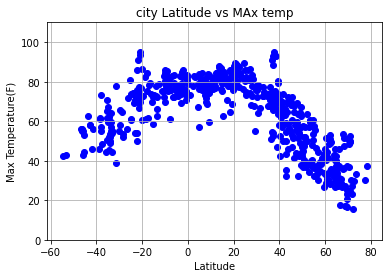

In [111]:

plt.scatter(lats,max_temps,marker='o',c='blue',)
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.title("city Latitude vs MAx temp")
plt.grid()
plt.ylim(0,110)


In [117]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today
today=time.strftime("%x")
today

'10/02/21'

'10/02/21'

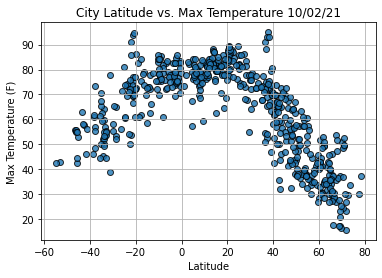

In [118]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

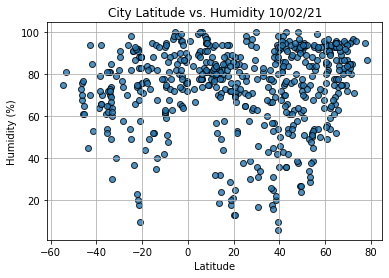

In [124]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.


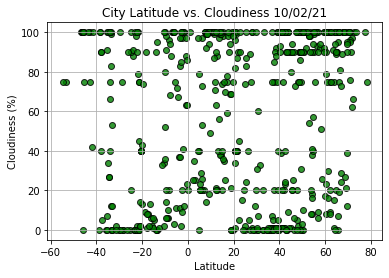

In [125]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",c="green",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.


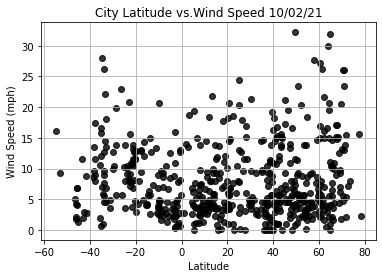

In [126]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",c="black",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")


In [128]:
# Import linregress
from scipy.stats import linregress

In [129]:


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

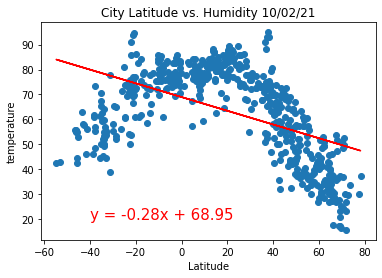

In [138]:
plot_linear_regression(lats, max_temps, f"City Latitude vs. Humidity "+ time.strftime("%x"), "Temperature", (-40,20))

In [164]:
# northern hemisphere 

northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head(1)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Sorland,NO,2021-10-03 00:40:00,67.667,12.6934,53.73,81,100,17.02


C:\Users\aryam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\aryam\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 12 missing from current font.
  font.set_text(s, 0, flags=flags)


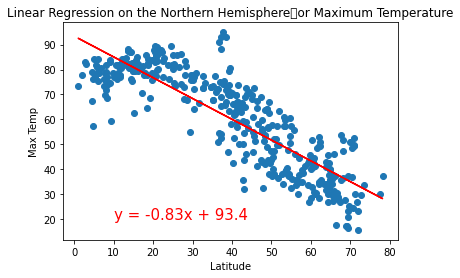

LinregressResult(slope=-0.8339485165987531, intercept=93.39879220321657, rvalue=-0.8564201049961478, pvalue=1.8772119663718254e-113, stderr=0.025522397652691334, intercept_stderr=1.1250425074014014)

In [165]:
x_values =northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\for Maximum Temperature', "Max Temp", (10,20))

linregress(x_values,y_values)

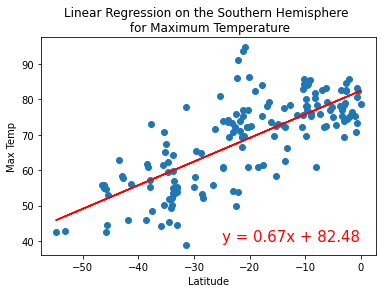

LinregressResult(slope=0.6674455786368797, intercept=82.47729859277281, rvalue=0.7498095471476179, pvalue=3.841883759700574e-30, stderr=0.046856204732517996, intercept_stderr=1.1735306515823258)

In [169]:
x_values =southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', "Max Temp", (-25,40))

linregress(x_values,y_values)

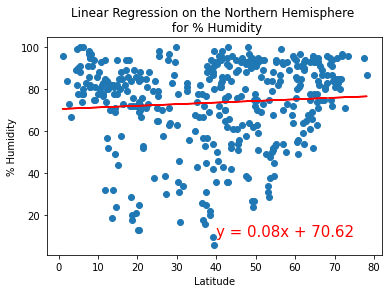

LinregressResult(slope=0.07705870715402446, intercept=70.61627608708264, rvalue=0.07408646018130276, pvalue=0.1441797202177642, stderr=0.05265890804365734, intercept_stderr=2.3212360667928413)

In [170]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

linregress(x_values,y_values)

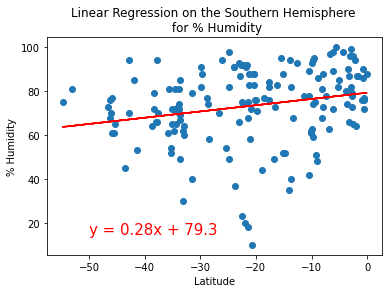

LinregressResult(slope=0.28438457681023993, intercept=79.30116525304534, rvalue=0.2266029368157476, pvalue=0.003958743998539701, stderr=0.09724453884952086, intercept_stderr=2.4355247654042844)

In [176]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))


linregress(x_values,y_values)


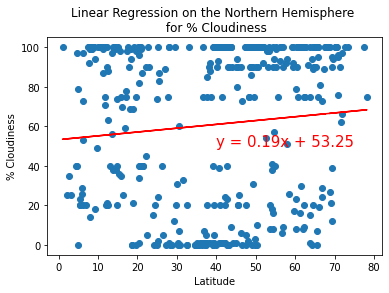

LinregressResult(slope=0.1932742297592689, intercept=53.250697012098215, rvalue=0.09752773733453636, pvalue=0.054301195956603245, stderr=0.10012778838002198, intercept_stderr=4.413692617462141)

In [174]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,50))

linregress(x_values,y_values)

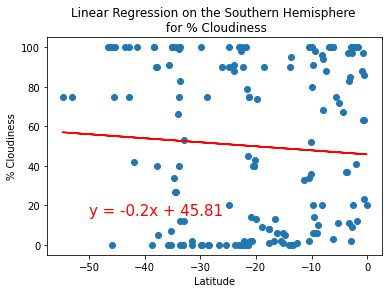

LinregressResult(slope=-0.20391141895489412, intercept=45.80608527179306, rvalue=-0.06876590455047339, pvalue=0.3875709562936378, stderr=0.23534803292435869, intercept_stderr=5.894376892088914)

In [177]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness','% Cloudiness',(-50,15))


linregress(x_values,y_values)

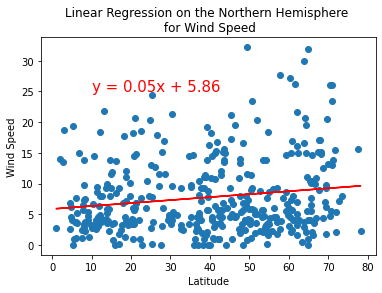

LinregressResult(slope=0.04812721014841512, intercept=5.858871059839595, rvalue=0.15696043323811104, pvalue=0.0018768152743292893, stderr=0.015373327105613437, intercept_stderr=0.6776654258491049)

In [180]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,25))

linregress(x_values,y_values)

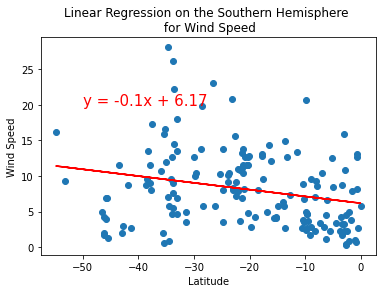

LinregressResult(slope=-0.09525684779485753, intercept=6.168828939698758, rvalue=-0.24586933736907057, pvalue=0.0017250286397321169, stderr=0.029876026776324345, intercept_stderr=0.748255932584722)

In [182]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

linregress(x_values,y_values)